In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 278us/step - loss: 0.8572 - accuracy: 0.7290 - val_loss: 0.6918 - val_accuracy: 0.7710
Epoch 2/20
12660/12660 [==============================] - 3s 263us/step - loss: 0.3672 - accuracy: 0.8790 - val_loss: 0.4992 - val_accuracy: 0.8588
Epoch 3/20
12660/12660 [==============================] - 3s 250us/step - loss: 0.2779 - accuracy: 0.9086 - val_loss: 0.5687 - val_accuracy: 0.8417
Epoch 4/20
12660/12660 [==============================] - 3s 250us/step - loss: 0.2458 - accuracy: 0.9214 - val_loss: 0.5220 - val_accuracy: 0.8612
Epoch 5/20
12660/12660 [==============================] - 3s 257us/step - loss: 0.1986 - accuracy: 0.9359 - val_loss: 0.3979 - val_accuracy: 0.9074
Epoch 6/20
12660/12660 [==============================] - 3s 254us/step - loss: 0.1552 - accuracy: 0.9500 - val_loss: 0.4199 - val_accuracy: 0.9034
Epoch 7/20
12660/12660 [==============================] - 3s 26

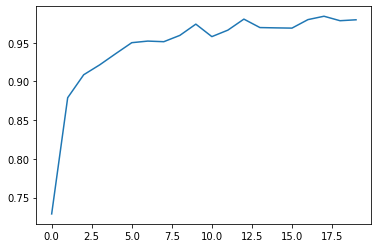

In [11]:
plt.plot(Base_Model.history['accuracy'])

Text(0, 0.5, 'Accuracy')

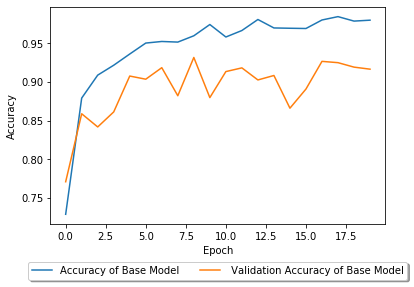

In [12]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [13]:
score = model.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 69us/step


In [14]:
score 

[0.4714683261653073, 0.9163069725036621]

In [100]:
predictions = model.predict_classes(x_test, batch_size=10)

In [16]:
rounded_labels=np.argmax(y_test, axis=1)

In [17]:
cm = confusion_matrix(rounded_labels, predictions)

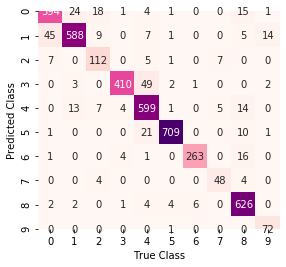

In [18]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [19]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       450
           1       0.88      0.93      0.91       630
           2       0.85      0.75      0.79       150
           3       0.88      0.98      0.92       420
           4       0.93      0.87      0.90       690
           5       0.96      0.98      0.97       720
           6       0.92      0.97      0.95       270
           7       0.86      0.80      0.83        60
           8       0.97      0.91      0.94       690
           9       0.99      0.80      0.88        90

    accuracy                           0.92      4170
   macro avg       0.91      0.89      0.90      4170
weighted avg       0.92      0.92      0.92      4170



# Changing Layers

## Double the layers

In [20]:
model1 = Sequential()

In [21]:
model1.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model1.add(Dense(512, activation = 'relu'))

# Layer 3
model1.add(Dense(512, activation = 'relu'))

# Layer 4
model1.add(Dense(512, activation = 'relu'))

#Output Layer
model1.add(Dense(10, activation = 'softmax'))

In [22]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [24]:
DoubleLayer = model1.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 6s 455us/step - loss: 0.8354 - accuracy: 0.7172 - val_loss: 0.8362 - val_accuracy: 0.7508
Epoch 2/20
12660/12660 [==============================] - 5s 416us/step - loss: 0.3764 - accuracy: 0.8629 - val_loss: 0.4810 - val_accuracy: 0.8492
Epoch 3/20
12660/12660 [==============================] - 5s 427us/step - loss: 0.2704 - accuracy: 0.9032 - val_loss: 0.9114 - val_accuracy: 0.7554
Epoch 4/20
12660/12660 [==============================] - 6s 453us/step - loss: 0.2605 - accuracy: 0.9062 - val_loss: 0.4031 - val_accuracy: 0.8765
Epoch 5/20
12660/12660 [==============================] - 5s 419us/step - loss: 0.1780 - accuracy: 0.9374 - val_loss: 0.4658 - val_accuracy: 0.8573
Epoch 6/20
12660/12660 [==============================] - 5s 420us/step - loss: 0.1825 - accuracy: 0.9336 - val_loss: 0.3780 - val_accuracy: 0.8909
Epoch 7/20
12660/12660 [==============================] - 5s 42

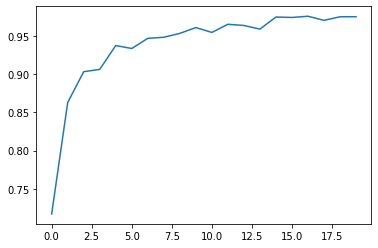

In [25]:
plt.plot(DoubleLayer.history['accuracy'])

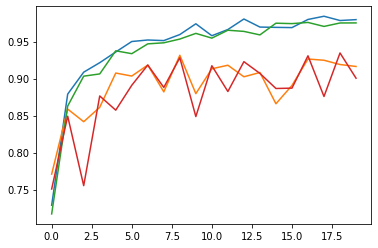

In [26]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])

In [27]:
score = model1.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 109us/step


In [28]:
score

[0.42787052057058117, 0.9004796147346497]

In [29]:
predictions = model1.predict_classes(x_test, batch_size=10)

In [30]:
cm = confusion_matrix(rounded_labels, predictions)

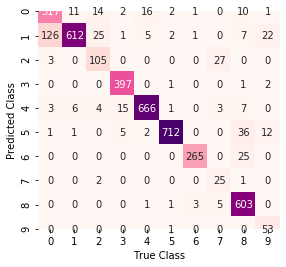

In [31]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [32]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       450
           1       0.76      0.97      0.86       630
           2       0.78      0.70      0.74       150
           3       0.99      0.95      0.97       420
           4       0.94      0.97      0.95       690
           5       0.93      0.99      0.96       720
           6       0.91      0.98      0.95       270
           7       0.89      0.42      0.57        60
           8       0.98      0.87      0.93       690
           9       0.98      0.59      0.74        90

    accuracy                           0.90      4170
   macro avg       0.90      0.81      0.84      4170
weighted avg       0.91      0.90      0.90      4170



## Half the Layers

In [33]:
model2 = Sequential()

In [34]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [35]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
OneLayer = model2.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 202us/step - loss: 0.9857 - accuracy: 0.7167 - val_loss: 0.7093 - val_accuracy: 0.7765
Epoch 2/20
12660/12660 [==============================] - 2s 175us/step - loss: 0.4497 - accuracy: 0.8737 - val_loss: 0.7642 - val_accuracy: 0.7839
Epoch 3/20
12660/12660 [==============================] - 2s 172us/step - loss: 0.3472 - accuracy: 0.8998 - val_loss: 0.4520 - val_accuracy: 0.8719
Epoch 4/20
12660/12660 [==============================] - 2s 172us/step - loss: 0.2754 - accuracy: 0.9212 - val_loss: 0.4336 - val_accuracy: 0.8902
Epoch 5/20
12660/12660 [==============================] - 2s 177us/step - loss: 0.2392 - accuracy: 0.9332 - val_loss: 0.3851 - val_accuracy: 0.8808
Epoch 6/20
12660/12660 [==============================] - 2s 178us/step - loss: 0.1970 - accuracy: 0.9457 - val_loss: 0.4635 - val_accuracy: 0.8604
Epoch 7/20
12660/12660 [==============================] - 2s 17

Text(0, 0.5, 'Accuracy')

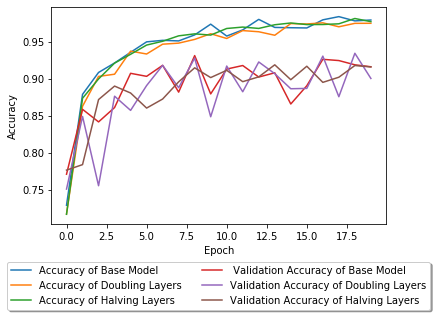

In [38]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(DoubleLayer.history['accuracy'], label='Accuracy of Doubling Layers')
plt.plot(OneLayer.history['accuracy'], label='Accuracy of Halving Layers')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(DoubleLayer.history['val_accuracy'], label='Validation Accuracy of Doubling Layers')
plt.plot(OneLayer.history['val_accuracy'], label='Validation Accuracy of Halving Layers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



In [39]:
score = model2.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 50us/step


In [40]:
score

[0.4565394675292128, 0.9160671234130859]

In [41]:
predictions = model2.predict_classes(x_test, batch_size=10)

In [42]:
cm = confusion_matrix(rounded_labels, predictions)

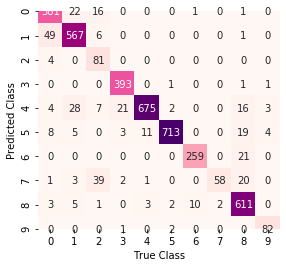

In [43]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [44]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       450
           1       0.91      0.90      0.91       630
           2       0.95      0.54      0.69       150
           3       0.99      0.94      0.96       420
           4       0.89      0.98      0.93       690
           5       0.93      0.99      0.96       720
           6       0.93      0.96      0.94       270
           7       0.47      0.97      0.63        60
           8       0.96      0.89      0.92       690
           9       0.96      0.91      0.94        90

    accuracy                           0.92      4170
   macro avg       0.89      0.89      0.88      4170
weighted avg       0.92      0.92      0.92      4170



# Changing Epochs

## Half Epochs

In [45]:
model3 = Sequential()

In [46]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [47]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
HalfEpochs = model3.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 4s 280us/step - loss: 0.8426 - accuracy: 0.7327 - val_loss: 0.5467 - val_accuracy: 0.8026
Epoch 2/10
12660/12660 [==============================] - 3s 269us/step - loss: 0.3922 - accuracy: 0.8698 - val_loss: 0.4596 - val_accuracy: 0.8561
Epoch 3/10
12660/12660 [==============================] - 3s 253us/step - loss: 0.2838 - accuracy: 0.9072 - val_loss: 0.4766 - val_accuracy: 0.8638
Epoch 4/10
12660/12660 [==============================] - 3s 253us/step - loss: 0.2232 - accuracy: 0.9279 - val_loss: 0.6493 - val_accuracy: 0.8319
Epoch 5/10
12660/12660 [==============================] - 3s 253us/step - loss: 0.1817 - accuracy: 0.9430 - val_loss: 0.4703 - val_accuracy: 0.8894
Epoch 6/10
12660/12660 [==============================] - 3s 261us/step - loss: 0.1617 - accuracy: 0.9473 - val_loss: 0.6798 - val_accuracy: 0.8441
Epoch 7/10
12660/12660 [==============================] - 3s 26

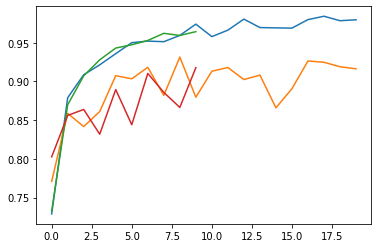

In [50]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])

In [51]:
score = model3.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 64us/step


In [52]:
score

[0.36706718651653764, 0.91774582862854]

(0, 10.0)

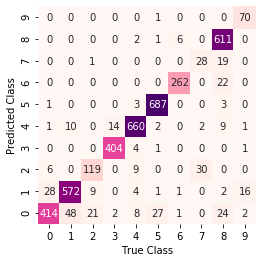

In [53]:
predictions = model3.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
axes = plt.gca()
axes.set_ylim([0,10.0])

In [54]:
print(classification_report(rounded_labels,predictions))


              precision    recall  f1-score   support

           0       0.76      0.92      0.83       450
           1       0.90      0.91      0.91       630
           2       0.73      0.79      0.76       150
           3       0.99      0.96      0.97       420
           4       0.94      0.96      0.95       690
           5       0.99      0.95      0.97       720
           6       0.92      0.97      0.95       270
           7       0.58      0.47      0.52        60
           8       0.99      0.89      0.93       690
           9       0.99      0.78      0.87        90

    accuracy                           0.92      4170
   macro avg       0.88      0.86      0.87      4170
weighted avg       0.92      0.92      0.92      4170



# Double Epochs

In [55]:
model5 = Sequential()

In [56]:
model5.add(Dense(512, activation='relu', input_shape=(784,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))


In [57]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [59]:
DoubleEpochs = model5.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/40
12660/12660 [==============================] - 4s 319us/step - loss: 0.8189 - accuracy: 0.7425 - val_loss: 0.7997 - val_accuracy: 0.7391
Epoch 2/40
12660/12660 [==============================] - 3s 271us/step - loss: 0.3768 - accuracy: 0.8759 - val_loss: 0.5431 - val_accuracy: 0.8297
Epoch 3/40
12660/12660 [==============================] - 3s 267us/step - loss: 0.2675 - accuracy: 0.9127 - val_loss: 0.6130 - val_accuracy: 0.8127
Epoch 4/40
12660/12660 [==============================] - 4s 277us/step - loss: 0.2252 - accuracy: 0.9310 - val_loss: 0.6168 - val_accuracy: 0.8345
Epoch 5/40
12660/12660 [==============================] - 3s 270us/step - loss: 0.1854 - accuracy: 0.9390 - val_loss: 0.5042 - val_accuracy: 0.8758
Epoch 6/40
12660/12660 [==============================] - 3s 257us/step - loss: 0.1718 - accuracy: 0.9434 - val_loss: 0.4563 - val_accuracy: 0.8978
Epoch 7/40
12660/12660 [==============================] - 3s 26

Text(0, 0.5, 'Accuracy')

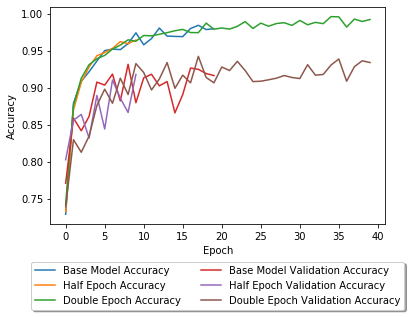

In [60]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(DoubleEpochs.history['accuracy'], label='Double Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(DoubleEpochs.history['val_accuracy'], label='Double Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [61]:
score = model5.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 71us/step


In [62]:
score

[0.45406883078408417, 0.9338129758834839]

Text(79.60000000000001, 0.5, 'Predicted Class')

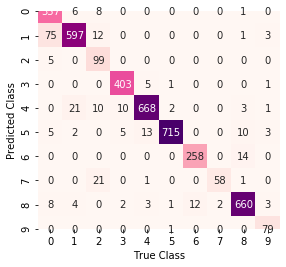

In [63]:
predictions = model5.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [64]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       450
           1       0.87      0.95      0.91       630
           2       0.95      0.66      0.78       150
           3       0.98      0.96      0.97       420
           4       0.93      0.97      0.95       690
           5       0.95      0.99      0.97       720
           6       0.95      0.96      0.95       270
           7       0.72      0.97      0.82        60
           8       0.95      0.96      0.95       690
           9       0.99      0.88      0.93        90

    accuracy                           0.93      4170
   macro avg       0.92      0.91      0.91      4170
weighted avg       0.94      0.93      0.93      4170



In [65]:
model6 = Sequential()

In [66]:
model6.add(Dense(512, activation='relu', input_shape=(784,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [67]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [69]:
FiveEpochs = model6.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/5
12660/12660 [==============================] - 4s 277us/step - loss: 0.8184 - accuracy: 0.7442 - val_loss: 0.5867 - val_accuracy: 0.8010
Epoch 2/5
12660/12660 [==============================] - 3s 261us/step - loss: 0.3734 - accuracy: 0.8791 - val_loss: 0.5585 - val_accuracy: 0.8182
Epoch 3/5
12660/12660 [==============================] - 3s 257us/step - loss: 0.2717 - accuracy: 0.9139 - val_loss: 0.7675 - val_accuracy: 0.8019
Epoch 4/5
12660/12660 [==============================] - 3s 259us/step - loss: 0.2351 - accuracy: 0.9230 - val_loss: 0.4336 - val_accuracy: 0.8847
Epoch 5/5
12660/12660 [==============================] - 3s 255us/step - loss: 0.1987 - accuracy: 0.9363 - val_loss: 0.3382 - val_accuracy: 0.9079


Text(0, 0.5, 'Accuracy')

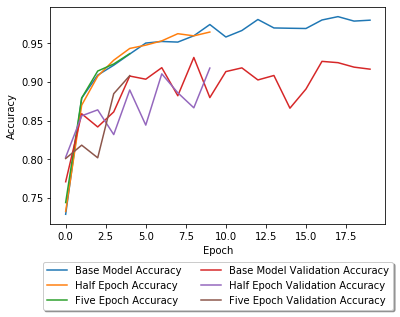

In [70]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(FiveEpochs.history['accuracy'], label='Five Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(FiveEpochs.history['val_accuracy'], label='Five Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Validation Threshold

In [71]:
from keras.callbacks import EarlyStopping

In [72]:
model8 = Sequential()

In [73]:
model8.add(Dense(512, activation='relu', input_shape=(784,)))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(10, activation='softmax'))

In [89]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=10)

In [90]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [91]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [92]:
Activation1 = model8.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 279us/step - loss: 0.1612 - accuracy: 0.9472 - val_loss: 0.3694 - val_accuracy: 0.9034
Epoch 2/20
12660/12660 [==============================] - 3s 275us/step - loss: 0.1389 - accuracy: 0.9533 - val_loss: 0.3487 - val_accuracy: 0.9151


Text(0, 0.5, 'Accuracy')

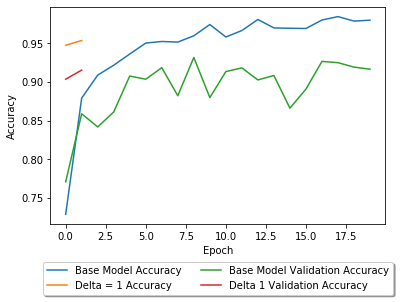

In [93]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation1.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation1.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [97]:
predictions = model8.predict_classes(x_test, batch_size=10)

Text(79.60000000000001, 0.5, 'Predicted Class')

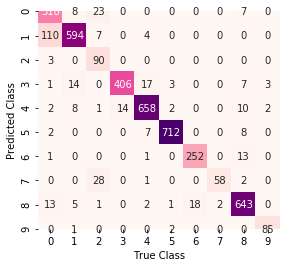

In [98]:
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [99]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       450
           1       0.83      0.94      0.88       630
           2       0.97      0.60      0.74       150
           3       0.90      0.97      0.93       420
           4       0.94      0.95      0.95       690
           5       0.98      0.99      0.98       720
           6       0.94      0.93      0.94       270
           7       0.65      0.97      0.78        60
           8       0.94      0.93      0.94       690
           9       0.97      0.94      0.96        90

    accuracy                           0.92      4170
   macro avg       0.90      0.89      0.89      4170
weighted avg       0.92      0.92      0.91      4170

